In [21]:
import pandas as pd
import numpy as np
import scipy
from scipy.optimize import curve_fit
import glob
import os

import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt

In [22]:
#Gets a list of files from the file path
fileList = sorted(glob.glob('Y://AVS_Group//Staff//Major//RTD calibration//Third try//Temperature//*'),key=os.path.getmtime )


In [23]:
#Creates a list with each measurement as a pandas dataframe
df = []
for i in range(len(fileList)):
    df.append(pd.read_excel(fileList[i] ,names = ['RTD1','RTD2','RTD3','RTD4','RTD5','RTD6','RTD7','RTD8','REF']))

In [24]:
#leaves only the rows containing the most common reference temperature
singleTemp = []
for i in range(len(fileList)):
    singleTemp.append(df[i].loc[df[i]['REF'] == df[i].mode().iloc[0]['REF']] )

<IPython.core.display.Javascript object>


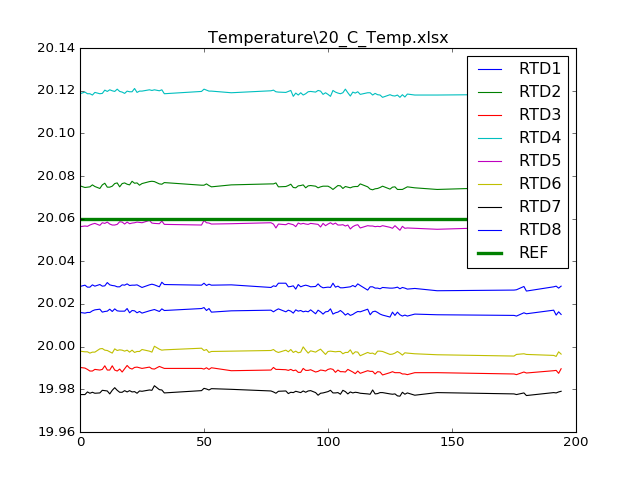

<IPython.core.display.Javascript object>


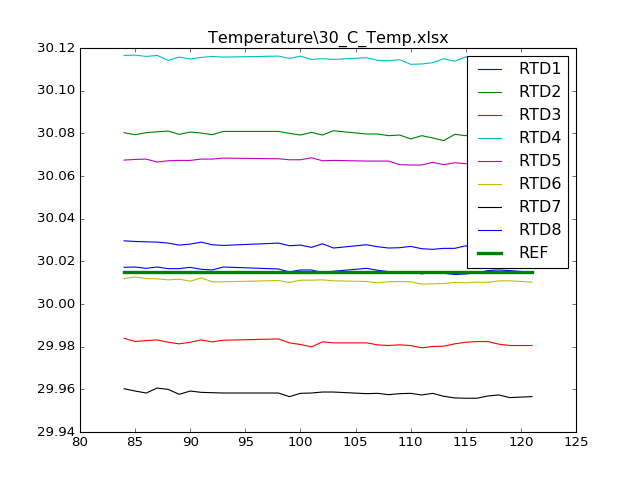

<IPython.core.display.Javascript object>


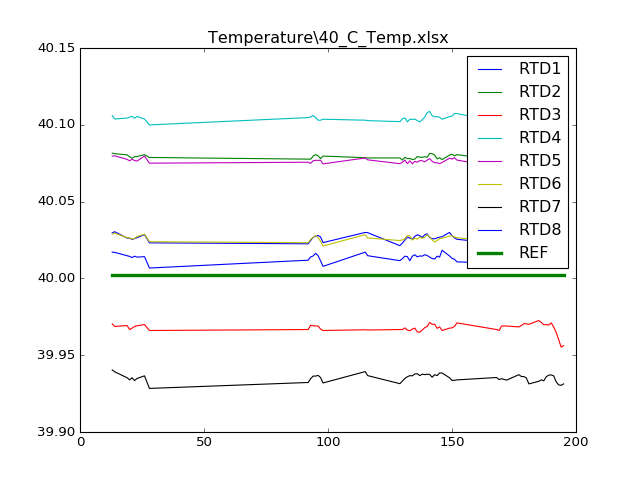

<IPython.core.display.Javascript object>


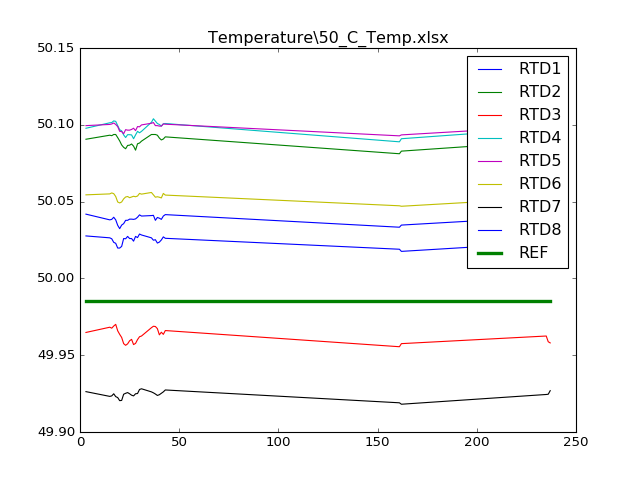

<IPython.core.display.Javascript object>


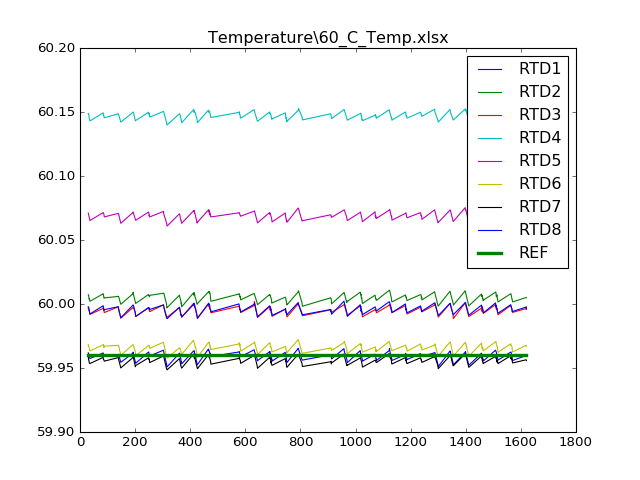

<IPython.core.display.Javascript object>


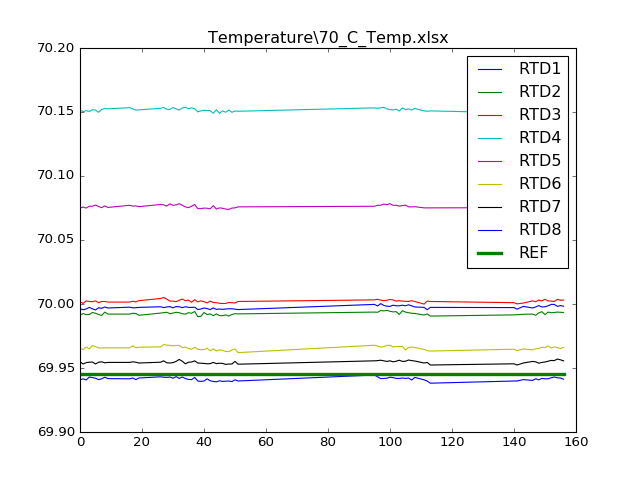

<IPython.core.display.Javascript object>


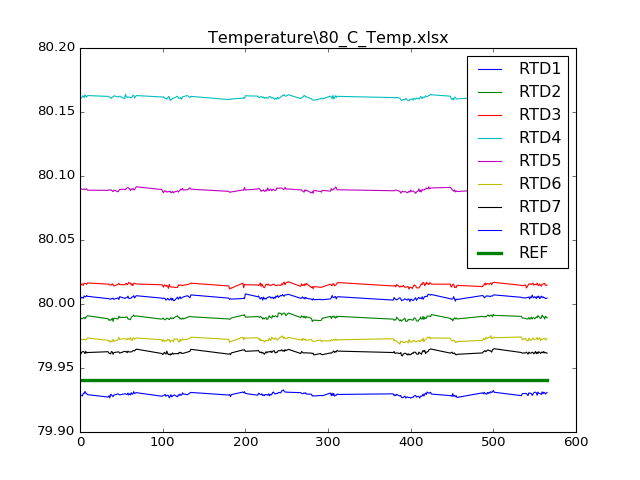

<IPython.core.display.Javascript object>


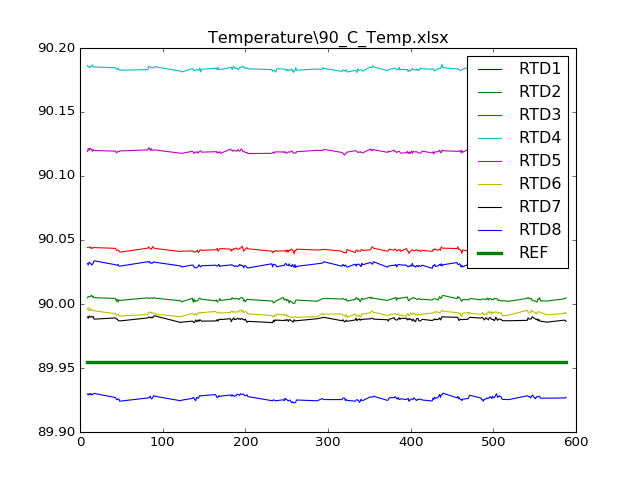

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


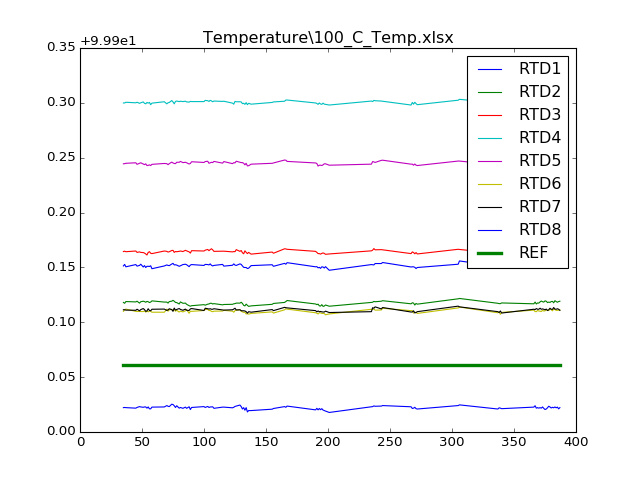

In [25]:
#Plots the readings for a single reference temperature
for j in range(len(singleTemp)):    
    for i in range(8):
        plt.plot(singleTemp[j]['RTD%s'%(i+1)], label = "RTD%s" %(i+1))
    plt.title(fileList[j][57:])
    plt.plot(singleTemp[j]['REF'], label = 'REF', linewidth = 3) #plots the ref temp. Disable for resistance
    plt.legend()
    plt.show()

    



In [26]:
#Takes the average reading for each RTD 
averages = []
for i in range(len(singleTemp)):
    averages.append(singleTemp[i].mean())

In [27]:
#This aranges the averages into a dataframe containg colums for the individual RTDs

#This loop appends the RTD data
lis = []
RTDs = []
for j in range(8):
    for i in range(len(averages)):
        lis.append(averages[i]['RTD%s' %(j+1)])
    RTDs.append(lis[:])
    del lis[:]

#This loop appends the REF data
for i in range(len(averages)):
    lis.append(averages[i]['REF'])
RTDs.append(lis)

#This section turns the list into a pandas dataframe
RTDs = pd.DataFrame(RTDs, index = None).T
RTDs.rename(columns = {0: 'RTD1', 1:'RTD2', 2:'RTD3', 3:'RTD4', 4:'RTD5', 5:'RTD6', 6:'RTD7', 7:'RTD8', 8:'REF' }, inplace = True)
RTDs



,RTD1,RTD2,RTD3,RTD4,RTD5,RTD6,RTD7,RTD8,REF
0,20.028262,20.075228,19.988887,20.118948,20.057101,19.997607,19.978685,20.016270,20.060
1,30.027232,30.079629,29.981658,30.114818,30.066956,30.010753,29.957926,30.015745,30.015
2,40.026264,40.079117,39.967753,40.104259,40.076393,40.025955,39.935294,40.013458,40.002
3,50.038388,50.089172,49.962706,50.097120,50.098214,50.053010,49.924320,50.024821,49.985
4,59.959457,60.005029,59.995365,60.147401,60.069115,59.966005,59.955769,59.995928,59.960
5,69.941416,69.992587,70.002163,70.151833,70.076133,69.965634,69.954567,69.997426,69.945
6,79.929365,79.989269,80.014791,80.161379,80.089080,79.972128,79.962191,80.004877,79.941
7,89.926599,90.003691,90.042343,90.183620,90.119112,89.992543,89.987939,90.030381,89.955
8,99.922186,100.017571,100.064389,100.200447,100.145098,100.010139,100.011297,100.051631,99.961


In [28]:
#Uses scipy polyfit to fit the data
from scipy import polyfit
cof = []
for i in range(len(list(RTDs))-1):
    cof.append(polyfit(RTDs['RTD%s'%(i+1)], RTDs['REF'], 3)) #the last number is the degree of the polynomial



In [29]:
#uses poly1d to assess the polynomial fit
fit = []
for i in range(8):
    p = np.poly1d(cof[i])
    fit.append(p(RTDs['RTD%s'%(i+1)]))
print('Average of the absolute difference between RTDs temp and the REF temp:')
for i in range(8):
    print('RTD%s:'%(i+1),round(np.mean(abs(RTDs['REF']-fit[i])),17)) #average of the absolute difference


Average of the absolute difference between RTDs temp and the REF temp:
RTD1: 0.00755101605126838
RTD2: 0.00888720841669115
RTD3: 0.00806479196460567
RTD4: 0.01041284718558602
RTD5: 0.0046197921807922
RTD6: 0.01059038090778665
RTD7: 0.0089185670265116
RTD8: 0.00408860170472596


C:\Program Files\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


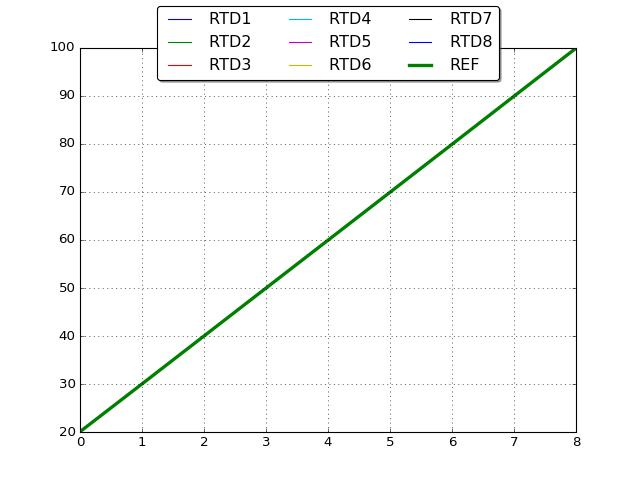

In [30]:
for i in range(8):
    plt.plot(fit[i],label = "RTD%s" %(i+1))


plt.plot(RTDs['REF'], linewidth = 3)
plt.grid()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.13),
          ncol=3, fancybox=True, shadow=True)
plt.show()